## Базовые операции предобработки изображений

Будут продемонстрированы следующие возможности библиотеки OpenCV для предобработки изображений:
1. Фильтрация
2. Размытие (сглаживание)
3. Морфологические операции (эрозия, дипалация)
4. Выделение краев
5. другие

## Свертка и линейные фильтры

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
original_impage = cv2.imread('foto.jpg')

## Фильрация

`filter2D` - фильтрация 2D изображений. 

Параметры:
1. `ddepth` - глубина результирующего изображения
2. `kernel` - ядро свёртки
3. `anchor` - ведущая позиция ядра. По умолчанию (-1, -1) - центральный пиксель
4. `borderType` - метод дополнения границы. Необходим для обработки граничных пикселей. Имеет префикс `BORDER_`
5. `delta` - костанта, которая добавляется к интенсивности после фильтрации

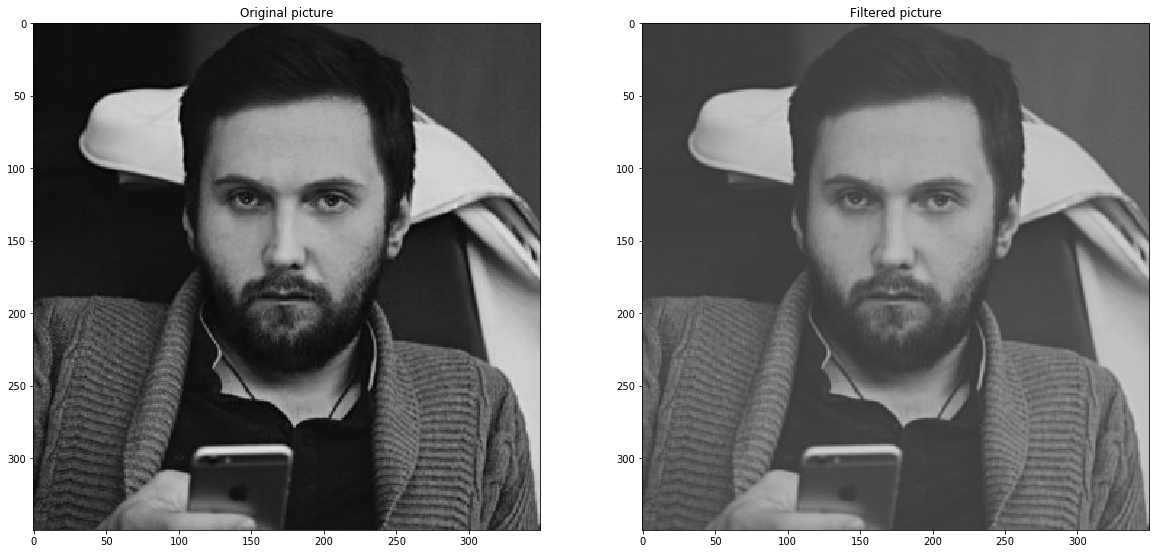

In [15]:
kernel = np.array([[-0.1, 0.2, -0.1], 
                   [0.2, 0.3, 0.2], 
                   [-0.1, 0.2, -0.1]])
filtered_image = cv2.filter2D(original_impage, 
                              ddepth=-1, 
                              kernel=kernel,
                              anchor = (1,1),
                              delta = 50,
                              borderType=cv2.BORDER_DEFAULT)
fig = plt.figure(figsize=(20,20))
fig.add_subplot(1,2, 1)
plt.imshow(cv2.cvtColor(original_impage, cv2.COLOR_BGR2RGB))
plt.title('Original picture')
fig.add_subplot(1,2, 2)
plt.title('Filtered picture')
plt.imshow(filtered_image)
plt.show()

## Сглаживание(размытие)

Для выполнения данной задачи есть 4 функции: `blur`, `boxFilter`(очень интуитивное название), `GasussianBlur`, `medianBlur`

Параметры:
1. `ksize`  - размер ядра
2. `anchor` - ведущая позиция ядра
3. `borderType` - метод дополнения границы. Необходим для обработки граничных пикселей. Имеет префикс `BORDER_`

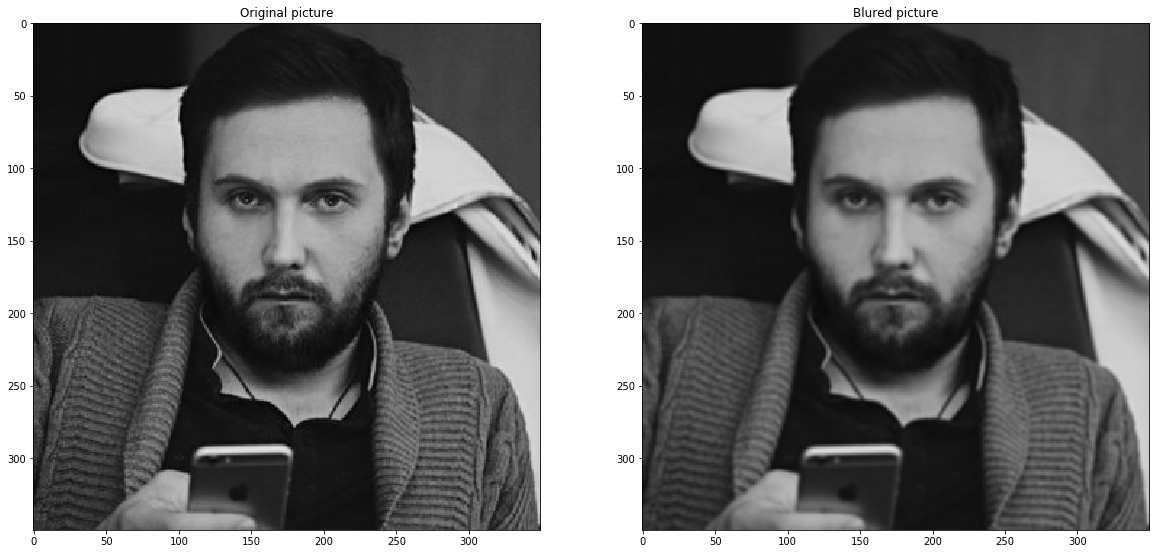

In [20]:
blured_image = cv2.blur(original_impage,     
                          anchor = (-1,-1),
                          ksize=(3,3),
                          borderType=cv2.BORDER_DEFAULT)
fig = plt.figure(figsize=(20,20))
fig.add_subplot(1,2, 1)
plt.imshow(cv2.cvtColor(original_impage, cv2.COLOR_BGR2RGB))
plt.title('Original picture')
fig.add_subplot(1,2, 2)
plt.title('Blured picture')
plt.imshow(blured_image)
plt.show()

## Даиалция и эрозия

Для диалации(локальный максимум интенсивности) есть фукнция `dialate`, для эрозии(локальный минимум интенсивности) - `erode`

Параметры:
1. `kernel` - ядро
2. `anchor` - позиция элемента, к которому применяется операция
3. `iterations` - кол-во раз, которое применяется операция
4. `borderType` - метод дополнения границы. Необходим для обработки граничных пикселей. Имеет префикс `BORDER_`
5. `borderValue` - размер границы

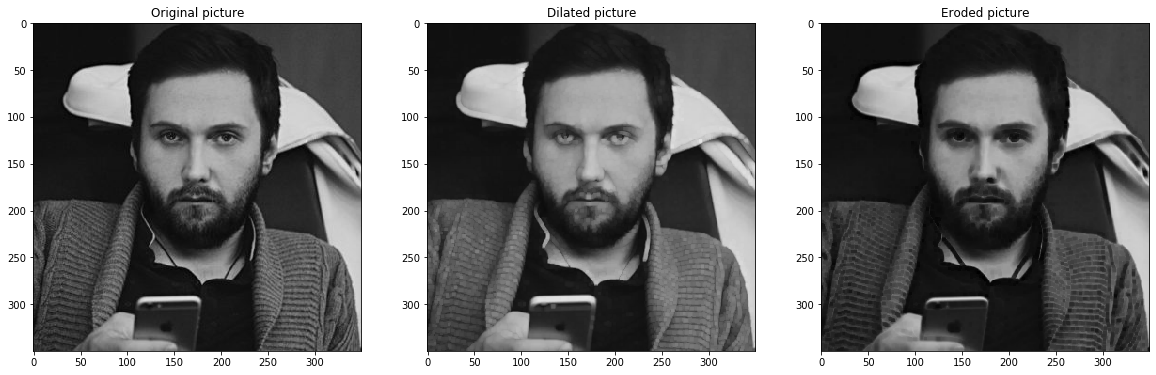

In [37]:
kernel = np.array([[-0.1, 0.2, -0.1], 
                   [0.2, 0.3, 0.2], 
                   [-0.1, 0.2, -0.1]])

gray_picture = cv2.cvtColor(original_impage, cv2.COLOR_BGR2GRAY)

dilated_picture = cv2.dilate(gray_picture, 
                              kernel=kernel, anchor=(-1,-1), 
                              iterations=1, 
                              borderType=cv2.BORDER_DEFAULT)
eroded_picture = cv2.erode(gray_picture, 
                              kernel=kernel, anchor=(-1,-1), 
                              iterations=1, 
                              borderType=cv2.BORDER_DEFAULT)

fig = plt.figure(figsize=(20,20))
fig.add_subplot(1,3, 1)
plt.imshow(cv2.cvtColor(gray_picture, cv2.COLOR_BGR2RGB))
plt.title('Original picture')
fig.add_subplot(1,3, 2)
plt.title('Dilated picture')
plt.imshow(cv2.cvtColor(dilated_picture, cv2.COLOR_BGR2RGB))
fig.add_subplot(1,3, 3)
plt.title('Eroded picture')
plt.imshow(cv2.cvtColor(eroded_picture, cv2.COLOR_BGR2RGB))
plt.show()

## Более сложные морфологические операции

Для их выполнения есть функция `morphologyEx`. У нее такие же параметры, как и у диалации и эрозии, но есть дополнительный параметр `op`, который отвечает за тип операции.

Виды операций:
1. `MORPH_OPEN` - размыкание. Применение диалации к эрозии исходного изображения
2. `MORPH_CLOSE` - замыкацие. Применение эрозии к диалации исходного изображения
3. `MORPH_GRADIENT` - морфологический градиент. Разница даилации и эрозии исходного изображения
4. `MORPH_TOPHAT` - "верх шляпы"(каждый должен знать что это такое). Разница между исходным изображением и размыканием.
5. `MORPH_BLACKHAT` - "черная шляпа"(вторая всем известная операция). Разница между замыканием и исходным изображением

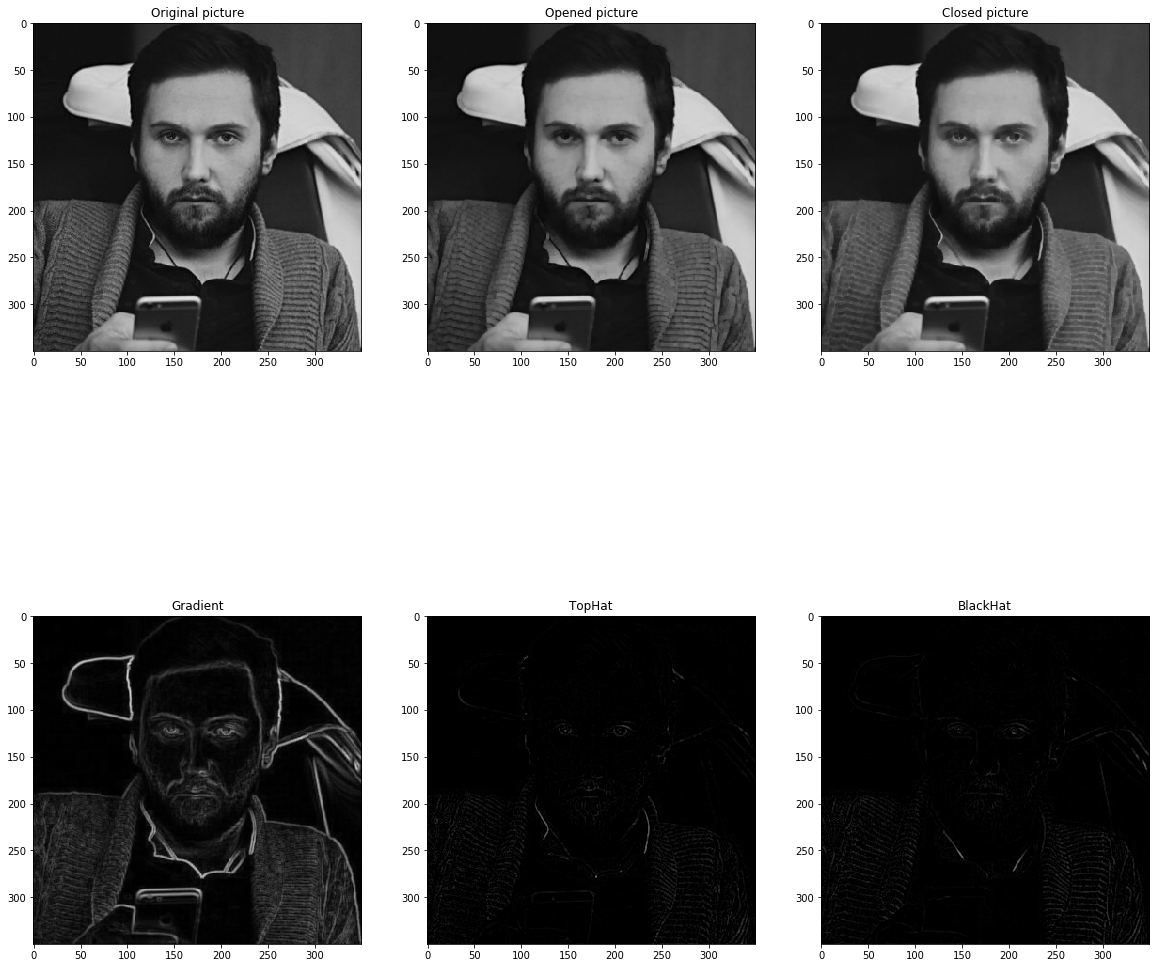

In [52]:
kernel = np.array([[-0.1, 0.2, -0.1], 
                   [0.2, 0.3, 0.2], 
                   [-0.1, 0.2, -0.1]])

gray_picture = cv2.cvtColor(original_impage, cv2.COLOR_BGR2GRAY)

open_picture = cv2.morphologyEx(gray_picture.copy(), 
                              kernel=kernel, anchor=(-1,-1), 
                              iterations=1, 
                              borderType=cv2.BORDER_DEFAULT,
                               op=cv2.MORPH_OPEN)

close_picture = cv2.morphologyEx(gray_picture.copy(), 
                              kernel=kernel, anchor=(-1,-1), 
                              iterations=1, 
                              borderType=cv2.BORDER_DEFAULT,
                                op=cv2.MORPH_CLOSE)

gradiented_picture =cv2.morphologyEx(gray_picture.copy(), 
                              kernel=kernel, anchor=(-1,-1), 
                              iterations=1, 
                              borderType=cv2.BORDER_DEFAULT,
                                op=cv2.MORPH_GRADIENT)

top_picture =cv2.morphologyEx(gray_picture.copy(), 
                              kernel=kernel, anchor=(-1,-1), 
                              iterations=1, 
                              borderType=cv2.BORDER_DEFAULT,
                                op=cv2.MORPH_TOPHAT)

black_picture =cv2.morphologyEx(gray_picture.copy(), 
                              kernel=kernel, anchor=(-1,-1), 
                              iterations=1, 
                              borderType=cv2.BORDER_DEFAULT,
                                op=cv2.MORPH_BLACKHAT)

fig = plt.figure(figsize=(20,20))
fig.add_subplot(2,3, 1)
plt.imshow(cv2.cvtColor(gray_picture, cv2.COLOR_BGR2RGB))
plt.title('Original picture')
fig.add_subplot(2,3, 2)
plt.title('Opened picture')
plt.imshow(cv2.cvtColor(open_picture, cv2.COLOR_BGR2RGB))
fig.add_subplot(2,3, 3)
plt.title('Closed picture')
plt.imshow(cv2.cvtColor(close_picture, cv2.COLOR_BGR2RGB))
fig.add_subplot(2,3, 4)
plt.imshow(cv2.cvtColor(gradiented_picture, cv2.COLOR_BGR2RGB))
plt.title('Gradient')
fig.add_subplot(2,3, 5)
plt.title('TopHat')
plt.imshow(cv2.cvtColor(top_picture, cv2.COLOR_BGR2RGB))
fig.add_subplot(2,3, 6)
plt.title('BlackHat')
plt.imshow(cv2.cvtColor(black_picture, cv2.COLOR_BGR2RGB))
plt.show()

## Оператор Собела

Для использования оператора Собела есть фукнция `Sobel` со следующими параметрами:
1. `ddepth` - глубина изображения
2. `xorder` - порядок производной по оси х
3. `yorder` - порядок производной по оси у
4. `ksize` - развер расширенного яодра оператора Собела. Принимает значения 1, 3, 5 или 7
5. `scale` - коэфициент масштабирования для производный. По умолчанию не применяется
6. `delta` - константа, добавляемая к интенсивности
7. `borderType` - метод дополнения границы. Необходим для обработки граничных пикселей. Имеет префикс `BORDER_`

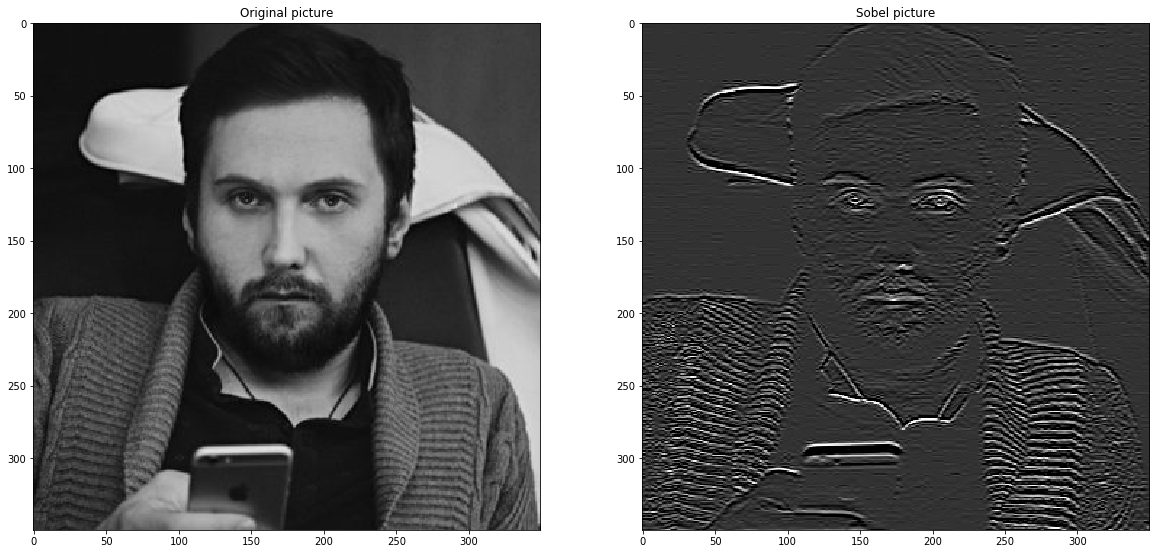

In [61]:
gray_picture = cv2.cvtColor(original_impage, cv2.COLOR_BGR2GRAY)

sobel_picture = cv2.Sobel(gray_picture, 
                          ddepth=-1, 
                          dx=0, 
                          dy=2, 
                          ksize=3, 
                          scale =1, 
                          delta=50, 
                          borderType=cv2.BORDER_DEFAULT)

fig = plt.figure(figsize=(20,20))
fig.add_subplot(1,2, 1)
plt.imshow(cv2.cvtColor(gray_picture, cv2.COLOR_BGR2RGB))
plt.title('Original picture')
fig.add_subplot(1,2, 2)
plt.title('Sobel picture')
plt.imshow(cv2.cvtColor(sobel_picture, cv2.COLOR_BGR2RGB))
plt.show()

## Оператор  Лапласа


Для использования оператора Лапласа есть фукнция `Laplacian` со следующими параметрами:
1. `ddepth` - глубина изображения
4. `ksize` - развер апертуры для вычисления второй производной
5. `scale` - коэфициент масштабирования для производный. По умолчанию не применяется
6. `delta` - константа, добавляемая к интенсивности
7. `borderType` - метод дополнения границы. Необходим для обработки граничных пикселей. Имеет префикс `BORDER_`

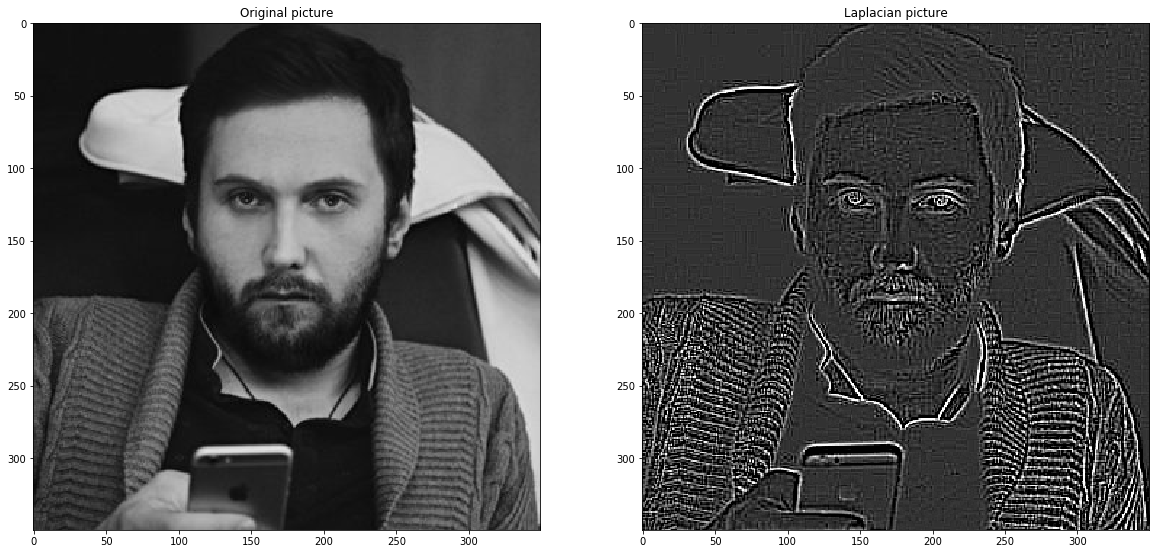

In [62]:
gray_picture = cv2.cvtColor(original_impage, cv2.COLOR_BGR2GRAY)

lap_picture = cv2.Laplacian(gray_picture, 
                          ddepth=-1,  
                          ksize=3, 
                          scale =1, 
                          delta=50, 
                          borderType=cv2.BORDER_DEFAULT)

fig = plt.figure(figsize=(20,20))
fig.add_subplot(1,2, 1)
plt.imshow(cv2.cvtColor(gray_picture, cv2.COLOR_BGR2RGB))
plt.title('Original picture')
fig.add_subplot(1,2, 2)
plt.title('Laplacian picture')
plt.imshow(cv2.cvtColor(lap_picture, cv2.COLOR_BGR2RGB))
plt.show()

## детектор ребер Канни

Для использования детектора ребер Канни есть фукнция `Canny` со следующими параметрами:
1. `threshold1` и `threshold2` - минимальный и максимальный пороги для отсечения и определения сильных и слабых ребер
2. `apertureSize` - размер апертуры для пременения оператора Собела
3. `L2gradient` - логический флаг. Если `true`- то используется L2-норма, если `false` - L1-норма(В целом, это очевидно из названия аргумента)

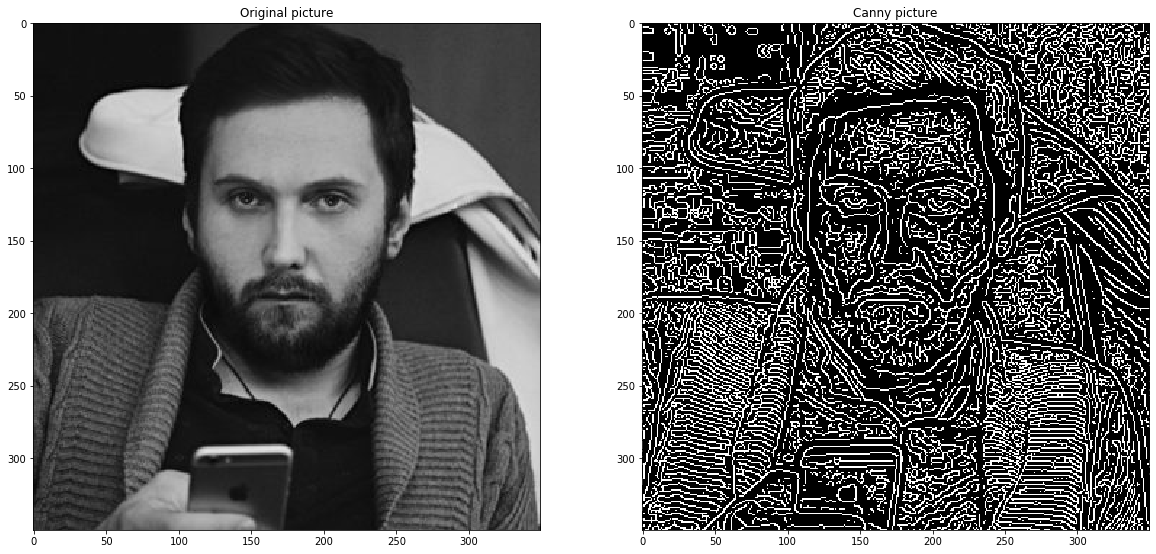

In [76]:
re = cv2.cvtColor(original_impage, cv2.COLOR_BGR2GRAY)

canny_picture = cv2.Canny(image=gray_picture, 
                          apertureSize=7,
                          threshold1=10, 
                          threshold2=100, 
                          L2gradient=True)

fig = plt.figure(figsize=(20,20))
fig.add_subplot(1,2, 1)
plt.imshow(cv2.cvtColor(gray_picture, cv2.COLOR_BGR2RGB))
plt.title('Original picture')
fig.add_subplot(1,2, 2)
plt.title('Canny picture')
plt.imshow(cv2.cvtColor(canny_picture, cv2.COLOR_BGR2RGB))
plt.show()

## Вычисление гистограмм

Для вычисления гистограмм интенсивностей есть функция `calcHist` со следующими параметрами:
1. `channels` - номер канала, для которого считается гистграмма
2. `mask` - маска, на которой считается гистограмма(считается интенсивность только для ненулевых элементов). Размер маски равен размеру изображения. При пустой маске гистограмма строится по всем пикселям изображения
3. `histsize` - кол-во бинов гистграммы
4. ` ranges` - интервал для расчета гистограммы

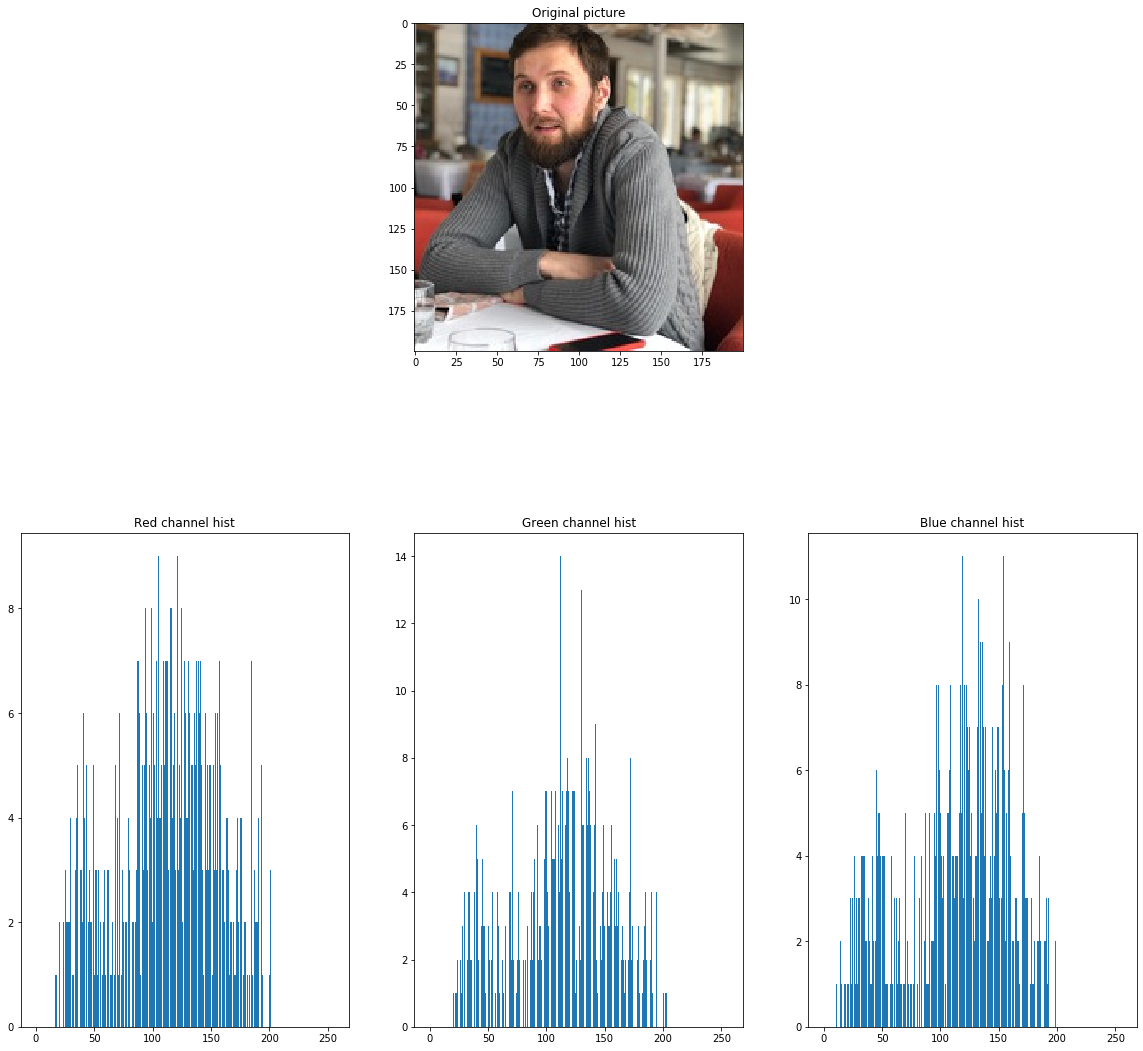

In [130]:

original_impage = cv2.imread('echo_foto.jpg')
red_hist_picture = cv2.calcHist(images=cv2.cvtColor(original_impage, cv2.COLOR_BGR2RGB), 
                            channels=[1], 
                            mask=None, 
                            histSize=[256], 
                            ranges=(0,256))
green_hist_picture = cv2.calcHist(images=cv2.cvtColor(original_impage, cv2.COLOR_BGR2RGB), 
                            channels=[2], 
                            mask=None, 
                            histSize=[256], 
                            ranges=(0,256))

blue_hist_picture = cv2.calcHist(images=cv2.cvtColor(original_impage, cv2.COLOR_BGR2RGB), 
                            channels=[3], 
                            mask=None, 
                            histSize=[256], 
                            ranges=(0,256))

fig = plt.figure(figsize=(20,20))
fig.add_subplot(2,3, 2)
plt.imshow(cv2.cvtColor(original_impage, cv2.COLOR_BGR2RGB))
plt.title('Original picture')
fig.add_subplot(2,3, 4)
plt.title('Red channel hist')
plt.bar(x=np.arange(0,256), height=list(map(lambda x: x[0], red_hist_picture)))
fig.add_subplot(2,3, 5)
plt.title('Green channel hist')
plt.bar(x=np.arange(0,256), height=list(map(lambda x: x[0], green_hist_picture)))
fig.add_subplot(2,3, 6)
plt.title('Blue channel hist')
plt.bar(x=np.arange(0,256), height=list(map(lambda x: x[0], blue_hist_picture)))
plt.show()

## Выравнивание гистрогамм

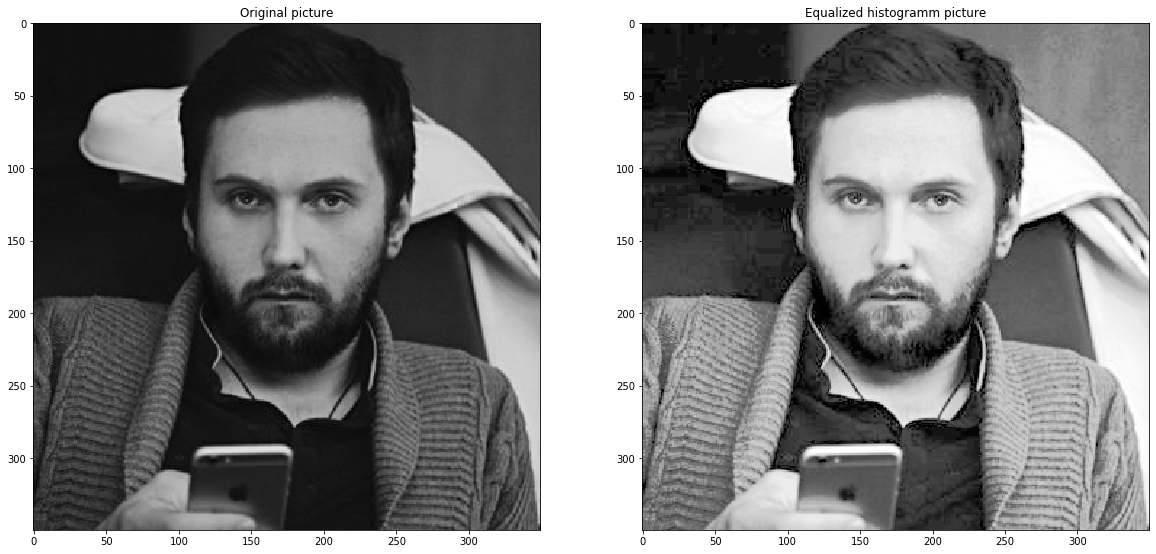

In [139]:
equalized_hist_picture = cv2.equalizeHist(gray_picture)

fig = plt.figure(figsize=(20,20))
fig.add_subplot(1,2, 1)
plt.imshow(cv2.cvtColor(gray_picture, cv2.COLOR_BGR2RGB))
plt.title('Original picture')
fig.add_subplot(1,2, 2)
plt.title('Equalized histogramm picture')
plt.imshow(cv2.cvtColor(equalized_hist_picture, cv2.COLOR_BGR2RGB))
plt.show()